In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Take in four years data and read it into pandas, the decimal and thousands things do not work
bls_2014 = pd.read_csv("bls_cve/bls_2014.csv",decimal=',')
bls_2015 = pd.read_csv("bls_cve/bls_2015.csv",thousands=',')
bls_2016 = pd.read_csv("bls_cve/bls_2016.csv",thousands=',')
bls_2017 = pd.read_csv("bls_cve/bls_2017.csv",thousands=',')

xlist=['TOT_EMP','A_PCT10','A_PCT25','A_MEDIAN','A_PCT75','A_PCT90']
# Clean the data
# I need a little more explaination about the below line
bls_2014=bls_2014[bls_2014.TOT_EMP!='**']
bls_2014=bls_2014[bls_2014.A_MEDIAN!='*']
bls_2014=bls_2014[bls_2014.A_PCT90!='#']
# bls_2014.TOT_EMP=bls_2014.TOT_EMP.str.replace(',', '')
for i in xlist:
    bls_2014[f'{i}']=bls_2014[f'{i}'].str.replace(',', '')
    bls_2014[f'{i}']=[float(i) for i in bls_2014[f'{i}']] 

bls_2015=bls_2015[bls_2015.TOT_EMP!='**'] 
bls_2015=bls_2015[bls_2015.A_MEDIAN!='*']
bls_2015=bls_2015[bls_2015.A_PCT90!='#']
# bls_2015.TOT_EMP=bls_2015.TOT_EMP.str.replace(',', '')
for i in xlist:
    bls_2015[f'{i}']=bls_2015[f'{i}'].str.replace(',', '')
    bls_2015[f'{i}']=[float(i) for i in bls_2015[f'{i}']] 

bls_2016=bls_2016[bls_2016.TOT_EMP!='**'] 
bls_2016=bls_2016[bls_2016.A_MEDIAN!='*']
# bls_2016.TOT_EMP=bls_2016.TOT_EMP.str.replace(',', '')
bls_2016=bls_2016[bls_2016.A_PCT90!='#']
for i in xlist:
    bls_2016[f'{i}']=bls_2016[f'{i}'].str.replace(',', '')
    bls_2016[f'{i}']=[float(i) for i in bls_2016[f'{i}']] 


bls_2017=bls_2017[bls_2017.TOT_EMP!='**'] 
bls_2017=bls_2017[bls_2017.A_MEDIAN!='*']
# bls_2017.TOT_EMP=bls_2017.TOT_EMP.str.replace(',', '')
bls_2017=bls_2017[bls_2017.A_PCT90!='#']
for i in xlist:
    bls_2017[f'{i}']=bls_2017[f'{i}'].str.replace(',', '')
    bls_2017[f'{i}']=[float(i) for i in bls_2017[f'{i}']] 

bls_2015.NAICS=[i//10000 for i in bls_2015.NAICS]
bls_2016.NAICS=[i//10000 for i in bls_2016.NAICS]
bls_2014.NAICS=[i//10000 for i in bls_2014.NAICS]
bls_2017.NAICS=[i[0]+i[1] for i in bls_2017.NAICS]
bls_2017.NAICS=[float(i) for i in bls_2017.NAICS]

In [2]:

bls_ins_2014=bls_2014.groupby(['NAICS'])
bls_ins_2015=bls_2015.groupby(['NAICS'])
bls_ins_2016=bls_2016.groupby(['NAICS'])
bls_ins_2017=bls_2017.groupby(['NAICS'])

df2014=bls_ins_2014.sum().TOT_EMP
df2015=bls_ins_2015.sum().TOT_EMP
df2016=bls_ins_2016.sum().TOT_EMP
df2017=bls_ins_2017.sum().TOT_EMP
# df2017.NAICS=[float(i) for i in df2017.NAICS]

df=pd.DataFrame({'2014':df2014,'2015':df2015,'2016':df2016,'2017':df2017})
ddf=pd.DataFrame({'Construction':df.iloc[1]+df.iloc[2]+df.iloc[3],'Manufacturing':df.iloc[4]+df.iloc[5]+df.iloc[6],
'Trade, Transportation, and Utilities':df.iloc[7]+df.iloc[8]+df.iloc[9]+df.iloc[10]+df.iloc[11],
'Information':df.iloc[12], 'Financial Activities':df.iloc[13]+df.iloc[14],'Professional, Scientific, and Technical':df.iloc[15],'Management and Administrative':df.iloc[16]+df.iloc[17], 
'Education':df.iloc[18],'Health Services':df.iloc[19],
'Leisure and Hospitality':df.iloc[20]+df.iloc[21],'Social Organizations':df.iloc[22],'Government':df.iloc[23]})
ddf

,Construction,Manufacturing,"Trade, Transportation, and Utilities",Information,Financial Activities,"Professional, Scientific, and Technical",Management and Administrative,Education,Health Services,Leisure and Hospitality,Social Organizations,Government
2014,28020.0,109020.0,117270.0,121680.0,300380.0,480100.0,251350.0,63400.0,68250.0,13380.0,21430.0,112210.0
2015,29510.0,109220.0,119340.0,129140.0,307050.0,521000.0,269160.0,66490.0,71460.0,15220.0,22000.0,111190.0
2016,31320.0,108400.0,125980.0,136380.0,334770.0,554340.0,284020.0,69820.0,78920.0,17230.0,22010.0,112930.0
2017,31510.0,114010.0,129310.0,142030.0,358660.0,579070.0,288730.0,72190.0,84580.0,19790.0,24150.0,115390.0


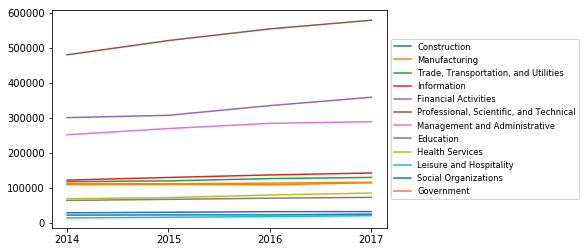

In [3]:

for i in ddf.columns:
    plt.plot(ddf.index, ddf[f'{i}'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize="small", fancybox=True)
# ddf.columns marker ='o', color='blue', label="Sine"



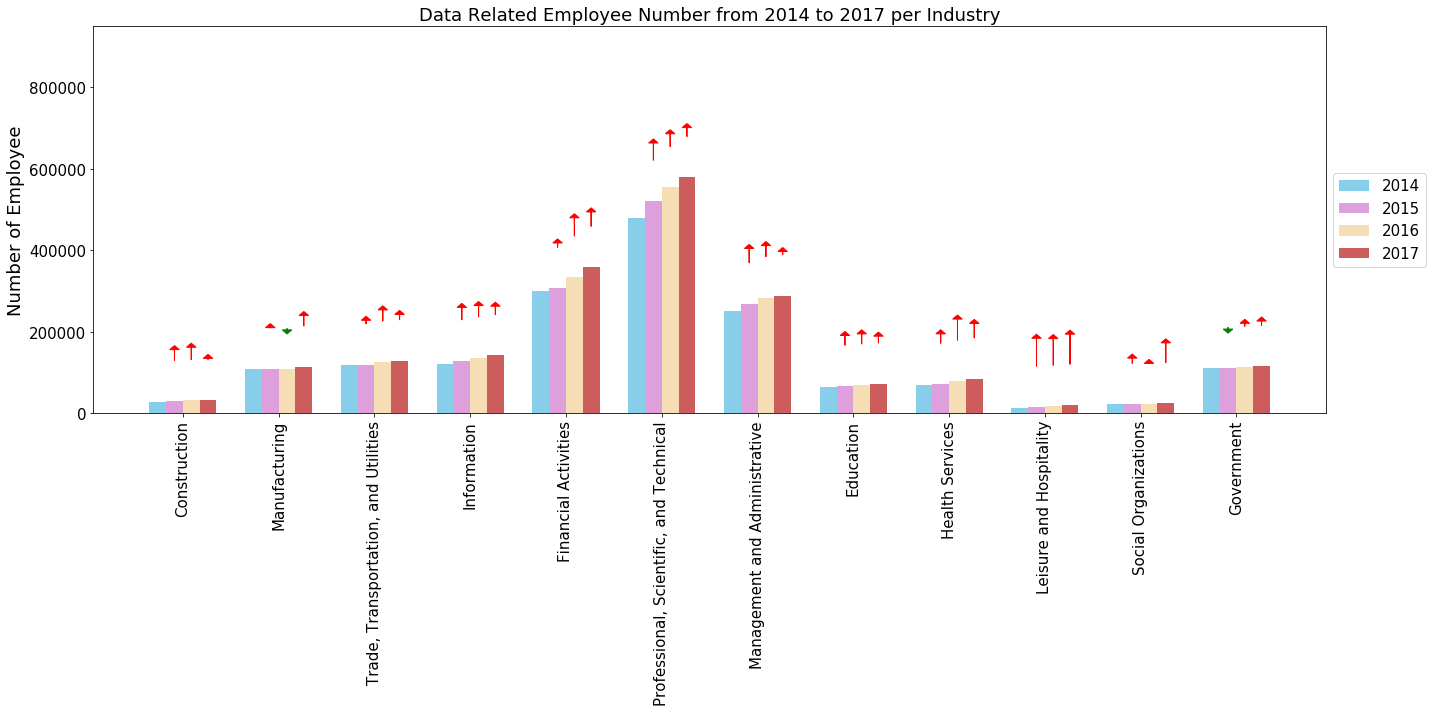

In [4]:
EMP_C2015=pd.DataFrame({'xx':(ddf.stack()['2015']-ddf.stack()['2014'])/ddf.stack()['2014']*500000})
EMP_C2016=pd.DataFrame({'xx':(ddf.stack()['2016']-ddf.stack()['2015'])/ddf.stack()['2015']*500000})
EMP_C2017=pd.DataFrame({'xx':(ddf.stack()['2017']-ddf.stack()['2016'])/ddf.stack()['2016']*500000})



ind = np.arange(len(ddf.columns))*2  # the x locations for the groups
width = 0.35 
plt.figure(figsize=(20,10))
# for i in ddf.columns:
rects1 = plt.bar(ind - width*1.5, ddf.stack()['2014'], width, 
                    color='SkyBlue', label='2014')
rects2 = plt.bar(ind- width/2, ddf.stack()['2015'], width, 
                    color='Plum', label='2015')

rects3 = plt.bar(ind+ width/2, ddf.stack()['2016'], width, 
                    color='Wheat', label='2016')
rects4 = plt.bar(ind + width*1.5, ddf.stack()['2017'], width, 
                    color='IndianRed', label='2017')
# ax.set_aspect(0.0004)

# p1 = plt.bar(x, EMP_C2015, width,
#              bottom=ddf.stack()['2015']+100000,color = 'red')
EMP_C2015['colors'] = 'g'
EMP_C2015.loc[EMP_C2015['xx']>=0,'colors'] = 'r'
# plt.bar(ind- width/2, EMP_C2015.xx, width, color=EMP_C2015.colors,bottom=ddf.stack()['2015']+100000)
EMP_C2016['colors'] = 'g'
EMP_C2016.loc[EMP_C2016['xx']>=0,'colors'] = 'r'
# plt.bar(ind+ width/2, EMP_C2016.xx, width, color=EMP_C2016.colors,bottom=ddf.stack()['2016']+100000)
EMP_C2017['colors'] = 'g'
EMP_C2017.loc[EMP_C2017['xx']>=0,'colors'] = 'r'
# plt.bar(ind + width*1.5, EMP_C2017.xx, width, color=EMP_C2017.colors,bottom=ddf.stack()['2017']+100000)
x=[ind- width/2,ind+ width/2,ind + width*1.5]
y=[ddf.stack()['2015']+100000,ddf.stack()['2016']+100000,ddf.stack()['2017']+100000]
dy=[EMP_C2015.xx,EMP_C2016.xx,EMP_C2017.xx]
colorsarrow=[EMP_C2015.colors,EMP_C2016.colors,EMP_C2017.colors]
for j in range(3):
    for i in range(len(x[0])):
        plt.arrow(x[j][i], y[j][i], 0, dy[j][i], head_width=0.2, head_length=10000, fc=colorsarrow[j][i], ec=colorsarrow[j][i])
# # Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Number of Employee',fontsize=18)
plt.ylim(0,950000)
plt.title('Data Related Employee Number from 2014 to 2017 per Industry',fontsize=18)
plt.xticks(ind,ddf.columns)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=15, fancybox=True)
plt.tight_layout()
plt.savefig('Number of Emp vs indudstry.png')

12

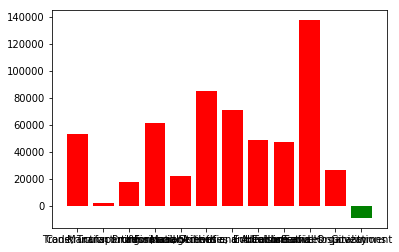

In [5]:
EMP_C2015=pd.DataFrame({'x':(ddf.stack()['2015']-ddf.stack()['2014'])/ddf.stack()['2014']*1000000})

EMP_C2015['colors'] = 'g'
EMP_C2015.loc[EMP_C2015['x']>=0,'colors'] = 'r'
plt.bar(EMP_C2015.index, EMP_C2015.x, color=EMP_C2015.colors)
EMP_C2017
ddf.stack()['2017']+100000+EMP_C2017.xx
len(ind + width*1.5)

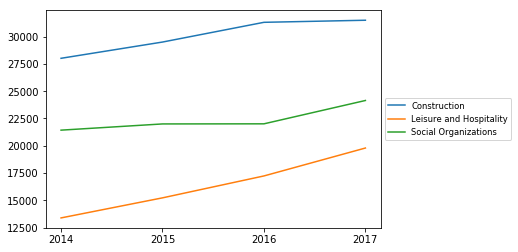

In [6]:
fieldlist=['Construction','Leisure and Hospitality','Social Organizations']

for i in fieldlist:
    plt.plot(ddf.index, ddf[f'{i}'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize="small", fancybox=True)

In [7]:
sal_2014=bls_ins_2014.A_MEDIAN.mean()
sal_2015=bls_ins_2015.A_MEDIAN.mean()
sal_2016=bls_ins_2016.A_MEDIAN.mean()
sal_2017=bls_ins_2017.A_MEDIAN.mean()

sal_df=pd.DataFrame({'2014':sal_2014,'2015':sal_2015,'2016':sal_2016,'2017':sal_2017})
sal_ddf=pd.DataFrame({'Natural Resources and Mining':sal_df.iloc[0],'Construction':(sal_df.iloc[1]+sal_df.iloc[2]+sal_df.iloc[3])/3,'Manufacturing':(sal_df.iloc[4]+sal_df.iloc[5]+sal_df.iloc[6])/3,
'Trade, Transportation, and Utilities':(sal_df.iloc[7]+sal_df.iloc[8]+sal_df.iloc[9]+sal_df.iloc[10]+sal_df.iloc[11])/5,
'Information':sal_df.iloc[12], 'Financial Activities':(sal_df.iloc[13]+sal_df.iloc[14])/2,'Professional and Business Services':(sal_df.iloc[15]+sal_df.iloc[16]+sal_df.iloc[17])/4, 
'Education and Health Services':(sal_df.iloc[18]+sal_df.iloc[19])/2,
'Leisure and Hospitality':(sal_df.iloc[20]+sal_df.iloc[21])/2,'Social Organizations':sal_df.iloc[22],'Government':sal_df.iloc[23]})

sal_ddf

,Natural Resources and Mining,Construction,Manufacturing,"Trade, Transportation, and Utilities",Information,Financial Activities,Professional and Business Services,Education and Health Services,Leisure and Hospitality,Social Organizations,Government
2014,58100.000000,78356.161531,69028.790454,66233.944442,80064.155844,72902.867122,55836.246471,63970.468841,56646.381119,67543.800000,74211.333333
2015,61025.000000,77952.281926,70143.516945,67409.561839,81707.368421,73603.733131,56908.338578,65696.469231,58563.472222,68773.584906,75754.333333
2016,64033.333333,80382.919192,71856.884780,67750.256930,82685.000000,76129.876543,58729.841222,67447.933183,59382.307692,71523.636364,75500.344828
2017,57030.000000,78940.479798,73572.301357,70514.271651,83278.906250,78860.263492,59502.136835,68489.725716,60585.512821,73588.571429,78240.333333


In [8]:
sal_2014=bls_ins_2014.A_PCT90.mean()-bls_ins_2014.A_MEDIAN.mean()
sal_2015=bls_ins_2015.A_PCT90.mean()-bls_ins_2015.A_MEDIAN.mean()
sal_2016=bls_ins_2016.A_PCT90.mean()-bls_ins_2016.A_MEDIAN.mean()
sal_2017=bls_ins_2017.A_PCT90.mean()-bls_ins_2017.A_MEDIAN.mean()

sal_df=pd.DataFrame({'2014':sal_2014,'2015':sal_2015,'2016':sal_2016,'2017':sal_2017})
sal_p_error=pd.DataFrame({'Natural Resources and Mining':sal_df.iloc[0],'Construction':(sal_df.iloc[1]+sal_df.iloc[2]+sal_df.iloc[3])/3,'Manufacturing':(sal_df.iloc[4]+sal_df.iloc[5]+sal_df.iloc[6])/3,
'Trade, Transportation, and Utilities':(sal_df.iloc[7]+sal_df.iloc[8]+sal_df.iloc[9]+sal_df.iloc[10]+sal_df.iloc[11])/5,
'Information':sal_df.iloc[12], 'Financial Activities':(sal_df.iloc[13]+sal_df.iloc[14])/2,'Professional and Business Services':(sal_df.iloc[15]+sal_df.iloc[16]+sal_df.iloc[17])/4, 
'Education and Health Services':(sal_df.iloc[18]+sal_df.iloc[19])/2,
'Leisure and Hospitality':(sal_df.iloc[20]+sal_df.iloc[21])/2,'Social Organizations':sal_df.iloc[22],'Government':sal_df.iloc[23]})

sal_p_error

,Natural Resources and Mining,Construction,Manufacturing,"Trade, Transportation, and Utilities",Information,Financial Activities,Professional and Business Services,Education and Health Services,Leisure and Hospitality,Social Organizations,Government
2014,48830.0,46526.607843,40499.291491,39479.675144,46634.415584,46336.988304,35155.234331,34483.810911,37081.975524,42366.000000,32230.666667
2015,57545.0,46036.846861,42712.518310,39381.057938,50369.210526,46626.998988,36809.981352,35327.419231,38107.175926,44733.584906,34960.000000
2016,69450.0,46532.703704,43367.241267,41484.224008,50966.375000,49081.975309,37842.313384,36808.655877,39281.346154,45941.818182,36634.827586
2017,61475.0,45717.444444,43275.409399,42557.078390,52356.875000,51848.171429,38147.764917,38652.870370,41097.549858,45647.678571,37818.000000


In [9]:
sal_2014=-bls_ins_2014.A_PCT10.mean()+bls_ins_2014.A_MEDIAN.mean()
sal_2015=-bls_ins_2015.A_PCT10.mean()+bls_ins_2015.A_MEDIAN.mean()
sal_2016=-bls_ins_2016.A_PCT10.mean()+bls_ins_2016.A_MEDIAN.mean()
sal_2017=-bls_ins_2017.A_PCT10.mean()+bls_ins_2017.A_MEDIAN.mean()

sal_df=pd.DataFrame({'2014':sal_2014,'2015':sal_2015,'2016':sal_2016,'2017':sal_2017})
sal_n_error=pd.DataFrame({'Natural Resources and Mining':sal_df.iloc[0],'Construction':(sal_df.iloc[1]+sal_df.iloc[2]+sal_df.iloc[3])/3,'Manufacturing':(sal_df.iloc[4]+sal_df.iloc[5]+sal_df.iloc[6])/3,
'Trade, Transportation, and Utilities':(sal_df.iloc[7]+sal_df.iloc[8]+sal_df.iloc[9]+sal_df.iloc[10]+sal_df.iloc[11])/5,
'Information':sal_df.iloc[12], 'Financial Activities':(sal_df.iloc[13]+sal_df.iloc[14])/2,'Professional and Business Services':(sal_df.iloc[15]+sal_df.iloc[16]+sal_df.iloc[17])/4, 
'Education and Health Services':(sal_df.iloc[18]+sal_df.iloc[19])/2,
'Leisure and Hospitality':(sal_df.iloc[20]+sal_df.iloc[21])/2,'Social Organizations':sal_df.iloc[22],'Government':sal_df.iloc[23]})

sal_n_error

,Natural Resources and Mining,Construction,Manufacturing,"Trade, Transportation, and Utilities",Information,Financial Activities,Professional and Business Services,Education and Health Services,Leisure and Hospitality,Social Organizations,Government
2014,22745.000000,29915.083100,25922.725359,24034.029198,32921.948052,28007.995452,22216.963580,23734.066201,22055.594406,26115.000000,24485.666667
2015,26315.000000,29381.040043,26370.044098,24500.262934,33939.078947,28786.320850,22975.355478,24889.869231,22470.879630,26352.830189,25177.000000
2016,22666.666667,31201.484848,26772.185333,24727.955676,33396.750000,30429.459877,23936.438816,25020.444002,23080.769231,27626.000000,25495.517241
2017,21145.000000,30578.373737,27419.101260,26001.556948,33566.093750,32274.774603,23976.840355,25131.871069,23591.153846,28631.071429,26959.333333


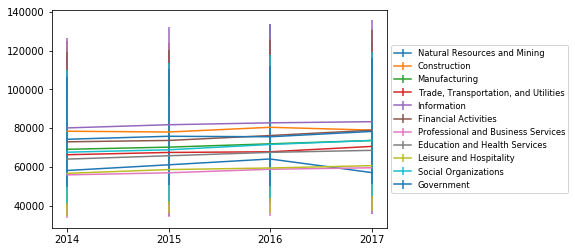

In [10]:
fieldlist=['Natural Resources and Mining','Construction','Manufacturing','Trade, Transportation, and Utilities','Information', 'Financial Activities','Professional and Business Services', 
 'Education and Health Services','Leisure and Hospitality','Social Organizations','Government']

for i in fieldlist:
    plt.errorbar(sal_ddf.index,sal_ddf[i], yerr=[sal_n_error[i],sal_p_error[i]])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize="small", fancybox=True)

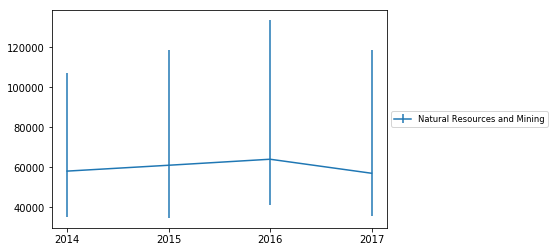

In [11]:
fieldlist=['Natural Resources and Mining']

for i in fieldlist:
    plt.errorbar(sal_ddf.index,sal_ddf[i], yerr=[sal_n_error[i],sal_p_error[i]])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize="small", fancybox=True)

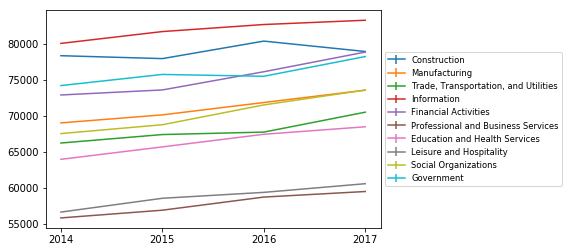

In [12]:
fieldlist=['Construction','Manufacturing','Trade, Transportation, and Utilities','Information', 'Financial Activities','Professional and Business Services', 
 'Education and Health Services','Leisure and Hospitality','Social Organizations','Government']

for i in fieldlist:
    plt.errorbar(sal_ddf.index,sal_ddf[i], yerr=0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize="small", fancybox=True)

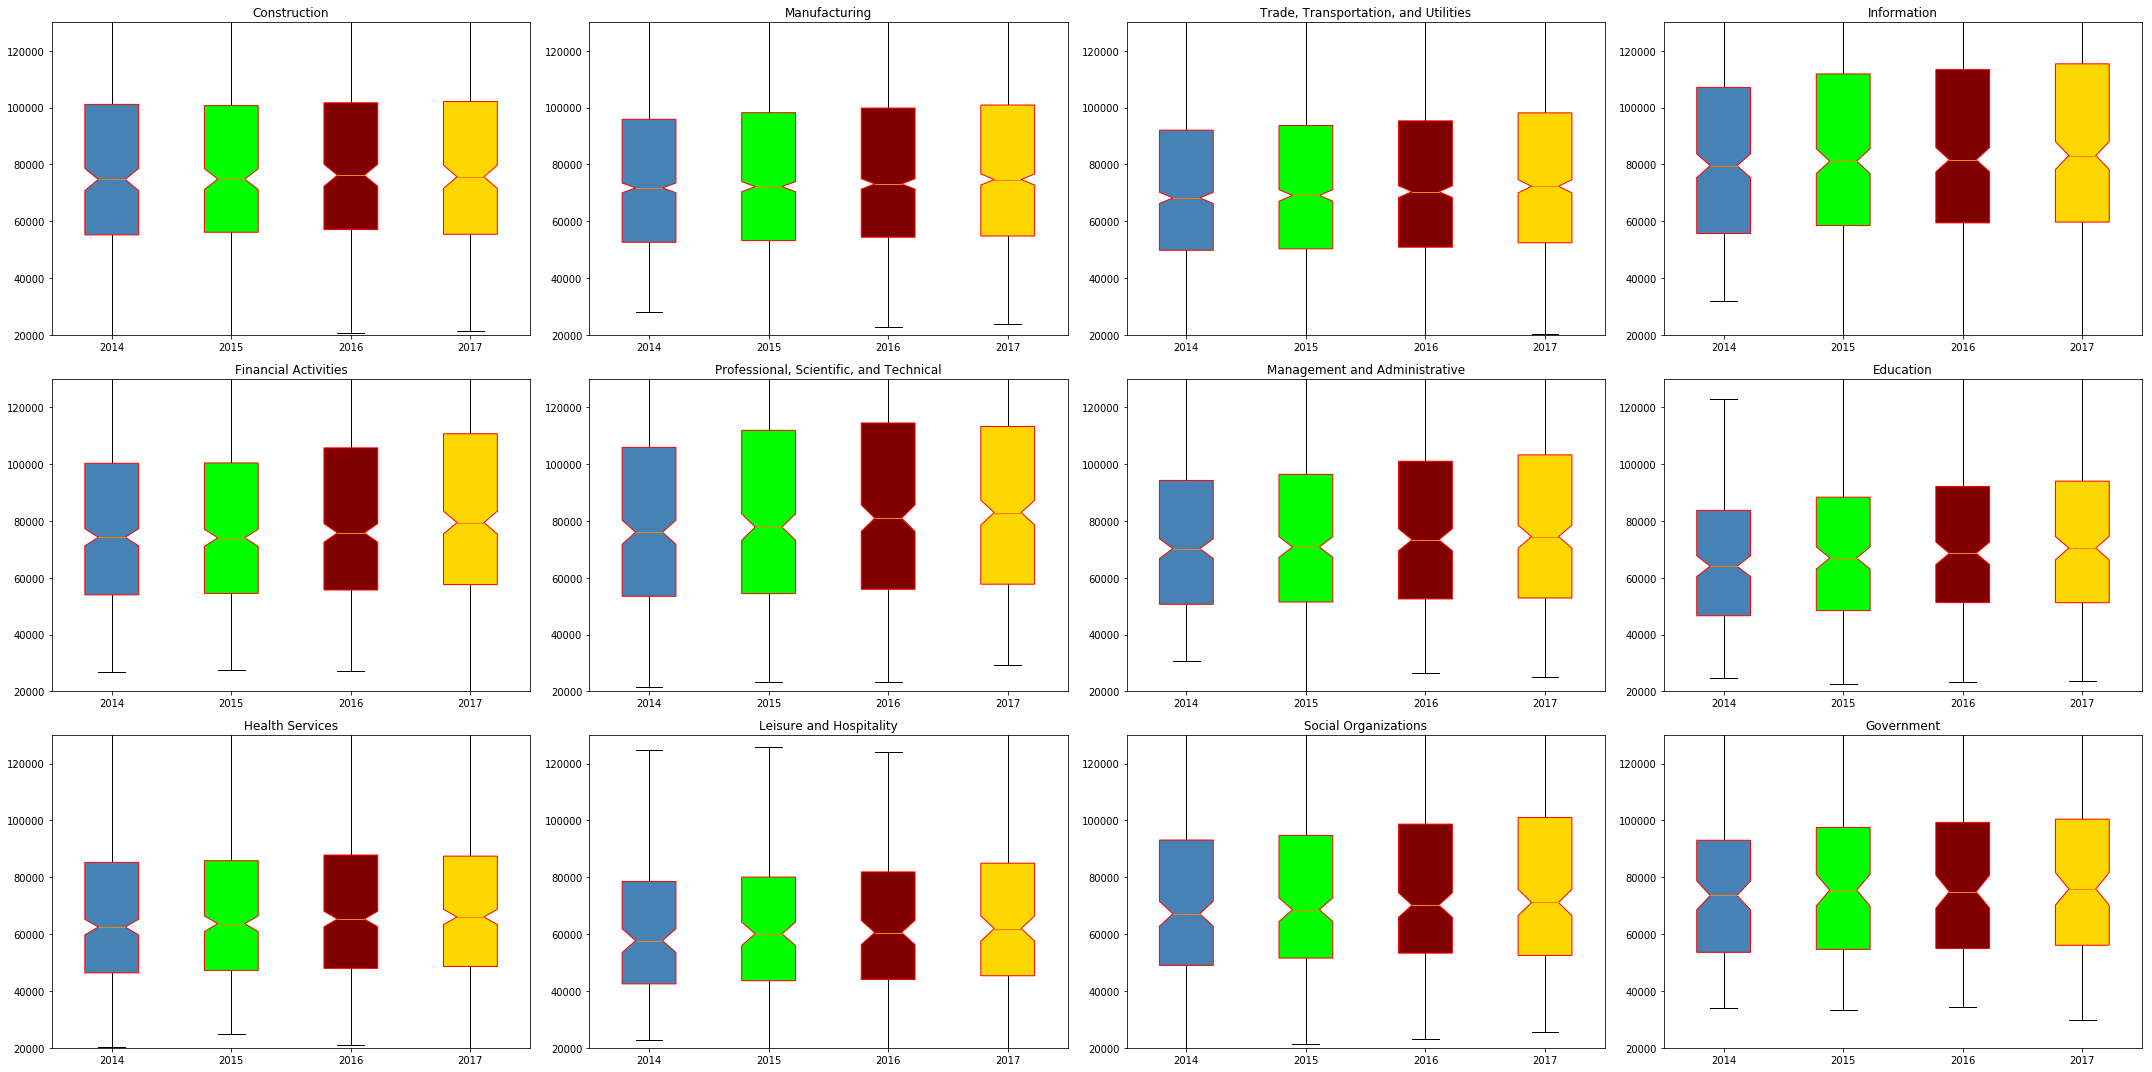

In [13]:
boxdata=[bls_2014[['NAICS','A_PCT10','A_PCT25','A_MEDIAN','A_PCT75','A_PCT90']].melt('NAICS', value_name='SAL').groupby('NAICS')['SAL'].unique(),
         bls_2015[['NAICS','A_PCT10','A_PCT25','A_MEDIAN','A_PCT75','A_PCT90']].melt('NAICS', value_name='SAL').groupby('NAICS')['SAL'].unique(),
         bls_2016[['NAICS','A_PCT10','A_PCT25','A_MEDIAN','A_PCT75','A_PCT90']].melt('NAICS', value_name='SAL').groupby('NAICS')['SAL'].unique(),
         bls_2017[['NAICS','A_PCT10','A_PCT25','A_MEDIAN','A_PCT75','A_PCT90']].melt('NAICS', value_name='SAL').groupby('NAICS')['SAL'].unique()]

# bls_2015_box.melt('NAICS', value_name='SAL').drop('variable', 1)
construction=[]
manufacturing=[]
trade_tran_util=[]
information=[]
financial=[]
pro_ser=[]
bui_ser=[]
edu=[]
heal=[]
leisure=[]
social_org=[]
goverment=[]

for x in boxdata:
    construction.append(np.hstack((x[21],x[22],x[23]))),
    manufacturing.append(np.hstack((x[31],x[32],x[33]))),
    trade_tran_util.append(np.hstack((x[42],x[44],x[45],x[48],x[49]))),
    information.append(np.hstack((x[51]))),
    financial.append(np.hstack((x[52],x[53]))),
    pro_ser.append(np.hstack((x[54]))),
    bui_ser.append(np.hstack((x[55],x[56]))),
    edu.append(np.hstack((x[61]))),
    heal.append(np.hstack((x[62]))),
    leisure.append(np.hstack((x[71],x[72]))),
    social_org.append(np.hstack((x[81]))),
    goverment.append(np.hstack((x[99])))
boxplotdata=[construction,manufacturing,trade_tran_util,information,financial,pro_ser,bui_ser,edu,heal,leisure,social_org,goverment]    
    
colorbox=['steelblue','lime','maroon','gold']
label=['2014','2015','2016','2017']
fig, axs = plt.subplots(nrows=3, ncols=4)
axs = axs.flatten()
for i in range(len(boxplotdata)):
    bplot=axs[i].boxplot(boxplotdata[i], labels=label, vert=True, notch=True,  boxprops=dict(facecolor='b', color='r'), patch_artist=True,)
    for patch, color in zip(bplot['boxes'], colorbox):
            patch.set_facecolor(color)
    axs[i].set_title(f'{ddf.columns[i]}')
    axs[i].set_ylim(20000,130000)
fig.set_size_inches(30, 15)
fig.tight_layout()
plt.savefig('salary vs indudstry.png')
            # boxplotdata[2]

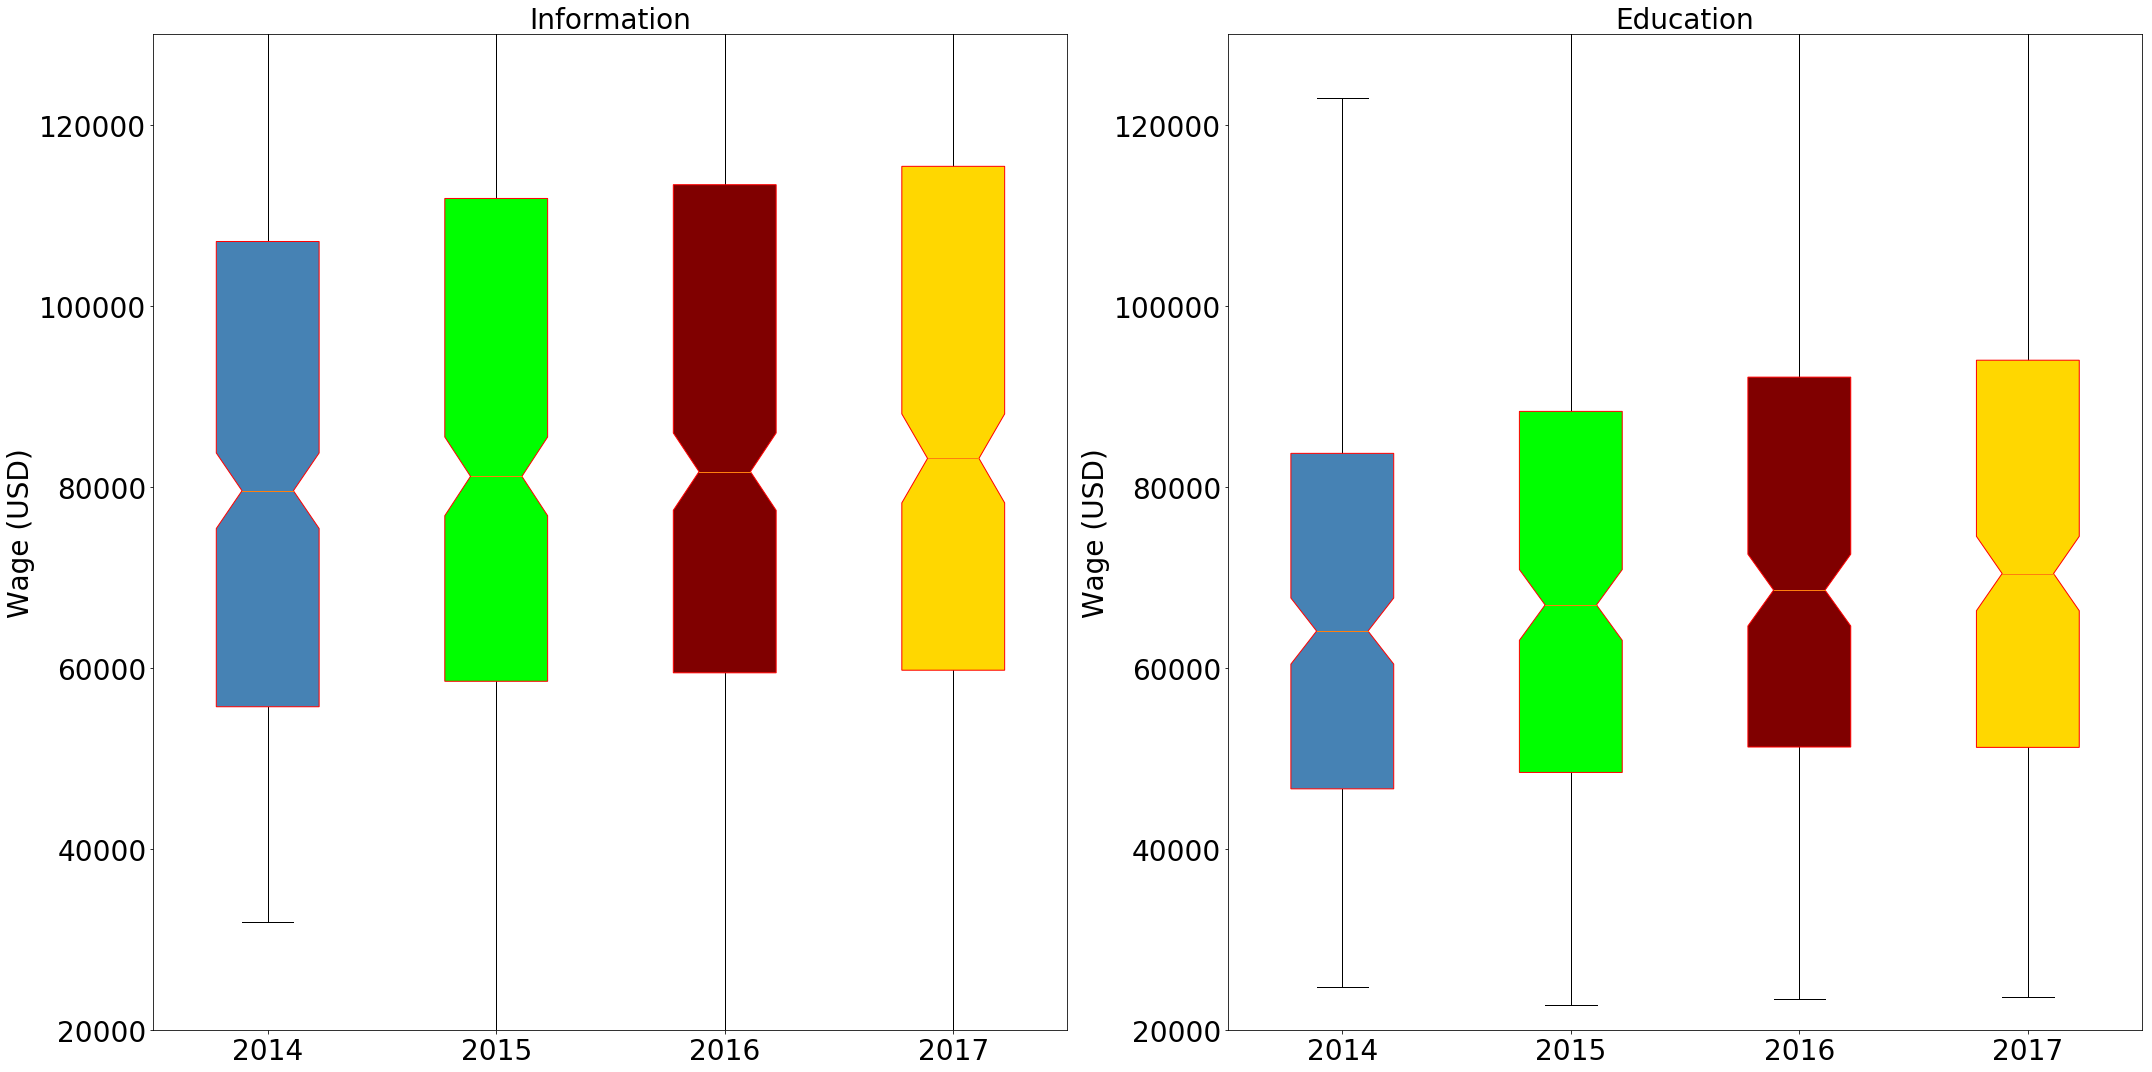

In [14]:
colorbox=['steelblue','lime','maroon','gold']
label=['2014','2015','2016','2017']
fig, axs = plt.subplots(nrows=1, ncols=2)
axs = axs.flatten()
boxplotdata_h=[information,edu]
labeltwo=['Information','Education']
for i in range(len(boxplotdata_h)):
    bplot=axs[i].boxplot(boxplotdata_h[i], labels=label, vert=True, notch=True,  boxprops=dict(facecolor='b', color='r'), patch_artist=True,)
    for patch, color in zip(bplot['boxes'], colorbox):
            patch.set_facecolor(color)
    axs[i].set_title(f'{labeltwo[i]}',fontsize='28')
    axs[i].set_ylabel('Wage (USD)', fontsize='28')
    axs[i].set_ylim(20000,130000)
    axs[i].tick_params(axis="x", labelsize=28)
    axs[i].tick_params(axis="y", labelsize=28)

fig.set_size_inches(30, 15)
fig.tight_layout()
plt.savefig('salary vs indudstry Two.png')